In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_samples

from statistics import mean
from statistics import median

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('/Users/david.hedges/projects/shodair/gsa_uncommented.vcf', sep='\t')

In [5]:
df = df.fillna(0)
df = df.replace('0/0',0)
df = df.replace('0/1',1)
df = df.replace('1/1',2)
df = df.replace('./.',0)
df = df.drop(columns=['#CHROM','POS','ID','REF','ALT','QUAL','FILTER','INFO','FORMAT'])
df

,1_SCH-845,2_SCH-31,3_SCH-463,4_SCH-253,5_SCH-522,6_SCH-794,7_SCH-187,8_SCH-615,9_SCH-911,10_SCH-807,...,159_SCH-641,160_SCH-211,161_SCH-317,162_SCH-830,163_SCH-506,164_SCH-212,165_SCH-169,166_SCH-788,167_SCH-891,168_SCH-459
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.T
X

,0,1,2,3,4,5,6,7,8,9,...,741352,741353,741354,741355,741356,741357,741358,741359,741360,741361
1_SCH-845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2_SCH-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3_SCH-463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4_SCH-253,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5_SCH-522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6_SCH-794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7_SCH-187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8_SCH-615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9_SCH-911,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_SCH-807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,0,0


# KMeans

In [5]:
n_clust = [2,3,4,5,6,7,8,9,10]
km_db = []
for i in n_clust:
    kmeans = KMeans(n_clusters=i, random_state=5, n_jobs=-1).fit(X)
    labels = kmeans.labels_
    score = davies_bouldin_score(X,labels)
    km_db.append(score)
    #print('*********************************')
    #print('For '+str(i)+' Centroids; score is: '+str(score))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_di

In [7]:
km_db

[2.523859220327204,
 8.223652302932429,
 8.086413620690053,
 6.653323598560715,
 6.49176677848475,
 2.5218603532628903,
 5.591503265525281,
 5.0673693113531355,
 4.431528506527639]

Text(0.5, 1.0, 'KMeans')

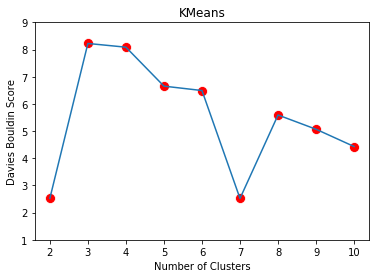

In [35]:
sns.scatterplot(x=n_clust,y=km_db,color='red',s=100)
sns.lineplot(x=n_clust,y=km_db)
plt.ylim(1,9)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.title('KMeans')

# Birch

In [22]:
n_clusters = [2,3,4,5,6,7,8,9,10]
birch_db = []
for i in n_clusters:
    birch = Birch(compute_labels=True, n_clusters=i)
    birch.fit(X)
    labels = birch.predict(X)
    score = davies_bouldin_score(X,labels)
    birch_db.append(score)
    #print('***************************************')
    #print('branching_factor = '+str(br))
    #print('cluster number   = '+str(i))
    #print('davies_bouldin   = '+str(score))
    #print('')

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_d

Text(0.5, 1.0, 'Birch')

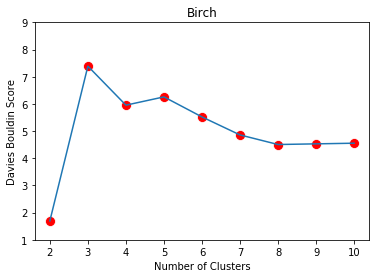

In [36]:
sns.scatterplot(x=n_clust,y=birch_db,color='red',s=100)
sns.lineplot(x=n_clust,y=birch_db)
plt.ylim(1,9)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.title('Birch')

# Agglomerative

In [25]:
n_clusters = [2,3,4,5,6,7,8,9,10]
agg_db = []
for i in n_clusters:
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = agg.fit_predict(X)
    score = davies_bouldin_score(X,labels)
    agg_db.append(score)
    #print('***************************************')
    #print('cluster number   = '+str(i))
    #print('davies_bouldin   = '+str(score))
    #print('')

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_d

Text(0.5, 1.0, 'Agglomerative')

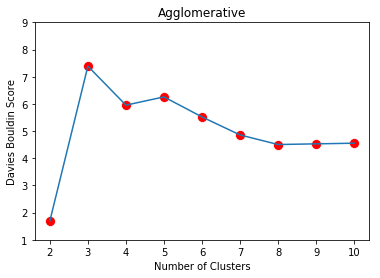

In [37]:
sns.scatterplot(x=n_clust,y=agg_db,color='red',s=100)
sns.lineplot(x=n_clust,y=agg_db)
plt.ylim(1,9)

plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.title('Agglomerative')

In [27]:
kmeans = KMeans(n_clusters=2, random_state=5, n_jobs=-1).fit(X)
labels = kmeans.labels_
kmeans_score = silhouette_samples(X,labels)

birch = Birch(compute_labels=True, n_clusters=2)
birch.fit(X)
labels = birch.predict(X)
birch_score = silhouette_samples(X,labels)

agg = AgglomerativeClustering(n_clusters=2).fit(X)
labels = agg.fit_predict(X)
agg_score = silhouette_samples(X,labels)

In [28]:
print('KMeans')
print('------')
print('Mean    = '+str(mean(kmeans_score)))
print('Median  = '+str(median(kmeans_score)))
print('Minimum = '+str(min(kmeans_score)))
print('Maximum = '+str(max(kmeans_score)))
print('')
print('')
print('Birch')
print('------')
print('Mean    = '+str(mean(birch_score)))
print('Median  = '+str(median(birch_score)))
print('Minimum = '+str(min(birch_score)))
print('Maximum = '+str(max(birch_score)))
print('')
print('')
print('Agglomerative')
print('------')
print('Mean    = '+str(mean(agg_score)))
print('Median  = '+str(median(agg_score)))
print('Minimum = '+str(min(agg_score)))
print('Maximum = '+str(max(agg_score)))

KMeans
------
Mean    = 0.015761839308892574
Median  = 0.014878349919913054
Minimum = -0.00047360338083580767
Maximum = 0.14086811768958213


Birch
------
Mean    = 0.0023297257033353686
Median  = -0.0012081169601049105
Minimum = -0.007736377324353047
Maximum = 0.316944460401526


Agglomerative
------
Mean    = 0.0023297257033353686
Median  = -0.0012081169601049105
Minimum = -0.007736377324353047
Maximum = 0.316944460401526


(-0.1, 0.1)

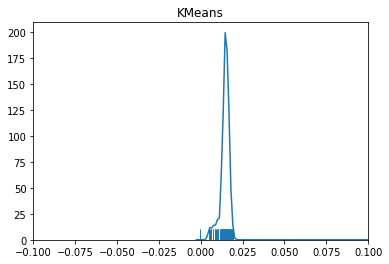

In [29]:
sns.distplot(kmeans_score, rug=True, hist=False).set_title('KMeans')
plt.xlim(-.1,.1)

(-0.1, 0.1)

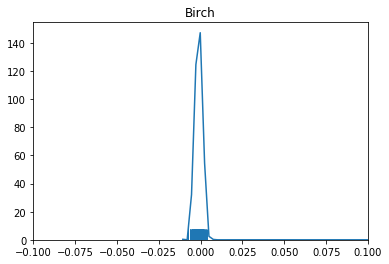

In [30]:
sns.distplot(birch_score, rug=True, hist=False).set_title('Birch')
plt.xlim(-.1,.1)

(-0.1, 0.1)

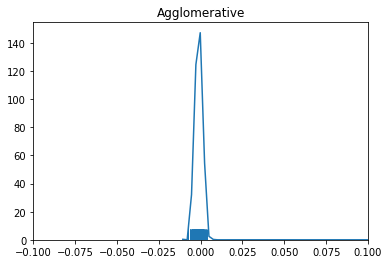

In [31]:
sns.distplot(agg_score, rug=True, hist=False).set_title('Agglomerative')
plt.xlim(-.1,.1)